In [62]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl
from IPython import display
from subprocess import call

In [63]:
gdf = gpd.read_file('../data/shapefile/DRC-healthzones/zone_stc_puc.shp')
evd_df = pd.read_csv('../data/ebola_drc/drc/data.csv').fillna(0)

In [64]:
evd_df['all_cases'] = evd_df.confirmed_cases + evd_df.probable_cases + evd_df.suspect_cases
evd_df['all_deaths'] = evd_df.confirmed_deaths + evd_df.probable_deaths + evd_df.suspect_deaths

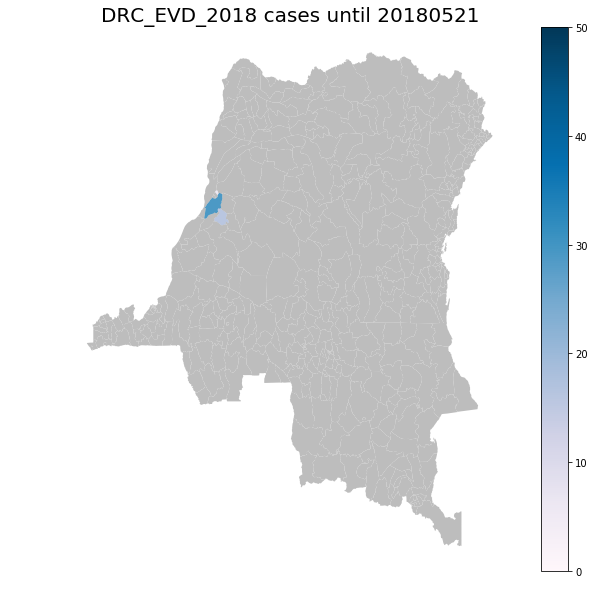

0

In [65]:
count = 0
for rd in evd_df.report_date.unique():
    f = plt.figure(figsize=(10,10))
    ax = plt.gca()
    plt.axis('off')
    plt.title('DRC_EVD_2018 cases until {}'.format(rd),fontsize=20)
    gdf.plot(color='#bdbdbd',ax=ax)
    df = evd_df[evd_df.report_date==rd]
    temp_gdf = gdf.merge(df,left_on='NOM_ZS',right_on='health_zone',how='inner')
    temp_gdf.plot(ax=ax,column='all_cases',cmap='PuBu',vmin=0,vmax=50,legend=True)
    display.clear_output(wait=True)
    display.display(pl.gcf())    
    plt.savefig('../plots/{:02d}.png'.format(count),bbox_inches='tight')
    count+=1
    plt.close()
call("convert -delay 200 -loop 1 ../plots/*.png ../plots/animated_DRC.gif".split(' '))

In [66]:
zs_list = evd_df.health_zone.unique()
prov_list = gdf[gdf.NOM_ZS.isin(zs_list)]['PROVINCE'].unique()

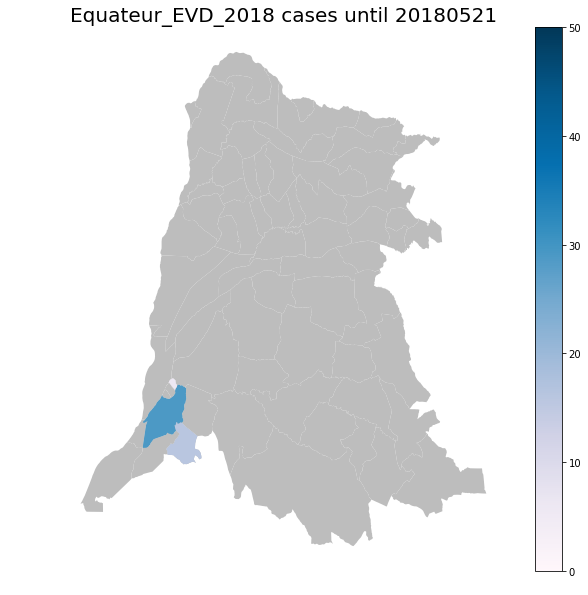

0

In [67]:
count = 0
mask = gdf.PROVINCE.isin(prov_list)
for rd in evd_df.report_date.unique():
    f = plt.figure(figsize=(10,10))
    ax = plt.gca()
    plt.axis('off')
    plt.title('Equateur_EVD_2018 cases until {}'.format(rd),fontsize=20)
    gdf[mask].plot(color='#bdbdbd',ax=ax)
    df = evd_df[evd_df.report_date==rd]
    temp_gdf = gdf.merge(df,left_on='NOM_ZS',right_on='health_zone',how='inner')
    temp_gdf.plot(ax=ax,column='all_cases',cmap='PuBu',vmin=0,vmax=50,legend=True)
    display.clear_output(wait=True)
    display.display(pl.gcf())    
    plt.savefig('../plots/{:02d}.png'.format(count),bbox_inches='tight')
    count+=1
    plt.close()
call("convert -delay 200 -loop 1 ../plots/*.png ../plots/animated_Equateur.gif".split(' '))